# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.014089e+01     9.098993e+00
 * time: 0.0016870498657226562
     1     2.917209e+01     5.493592e+00
 * time: 0.0074498653411865234
     2     1.984560e+01     5.504305e+00
 * time: 0.014556884765625
     3     1.463752e+01     5.374636e+00
 * time: 0.021394968032836914
     4     1.114232e+01     1.881006e+00
 * time: 0.028373003005981445
     5     1.048764e+01     2.723158e+00
 * time: 0.06684994697570801
     6     9.859723e+00     1.369100e+00
 * time: 0.07152986526489258
     7     9.242541e+00     1.702836e+00
 * time: 0.07619190216064453
     8     8.761460e+00     1.728100e+00
 * time: 0.08074593544006348
     9     8.531543e+00     1.199155e+00
 * time: 0.08561396598815918
    10     8.323769e+00     1.074653e+00
 * time: 0.09041309356689453
    11     8.175772e+00     6.885164e-01
 * time: 0.09618902206420898
    12     8.056974e+00     8.213429e-01
 * time: 0.1023719310760498
    13     8.042606e+00     8.741964e-01
 * ti

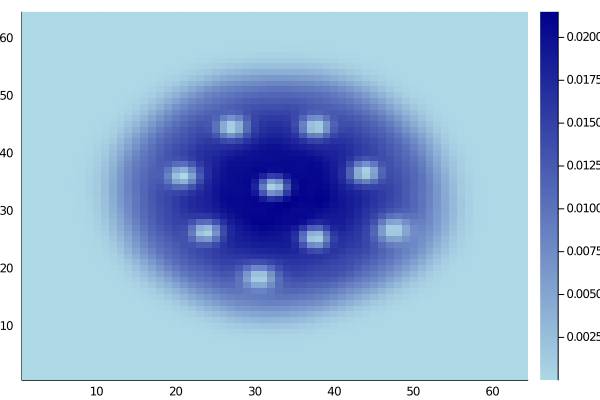

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)